In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import mlxtend
import xgboost

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

X_test = pd.read_csv(r'C:\Users\lucia\OneDrive - University of Calgary\University\Year 3\Semester 2\Bmen 415\Coursework\Course Project\_FINAL DATASETS\classification_Xtest.csv')
X_train = pd.read_csv(r'C:\Users\lucia\OneDrive - University of Calgary\University\Year 3\Semester 2\Bmen 415\Coursework\Course Project\_FINAL DATASETS\classification_Xtrain.csv')
y_test = pd.read_csv(r'C:\Users\lucia\OneDrive - University of Calgary\University\Year 3\Semester 2\Bmen 415\Coursework\Course Project\_FINAL DATASETS\classification_ytest.csv')
y_train = pd.read_csv(r'C:\Users\lucia\OneDrive - University of Calgary\University\Year 3\Semester 2\Bmen 415\Coursework\Course Project\_FINAL DATASETS\classification_ytrain.csv')

In [2]:
def model_metrics(model):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print('Training accuracy:', accuracy_score(y_train, y_train_pred))
    print('Testing accuracy:', accuracy_score(y_test, y_test_pred))

    confusion = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(confusion, square = True, annot = True, cbar = False, cmap = 'icefire', 
                xticklabels = ['benign', 'malignant'], yticklabels = ['benign', 'malignant'])

    plt.xlabel('predicted value')
    plt.ylabel('true value')

NOTES ON MODEL TUNING and PROCESSING

To (hopefully) improve model performance and differentiate some of these models from identical models done by others in our group, I first tried to perform feature selection using lasso regression or a 'naive' method (only using means, ste, or largest for each metric) BUT, unexpectedly, all methods of FS severely decreased model performance. This is unexpected since, according to one source, "classical model selection methods such as penalized logistic regression or random forest [as well as, likely, SVM] become unstable in the presence of high feature correlations."

Instead, to differentiate these models, I will peform model tuning for each dataset and evaluate performance before and after.

NOTE: Model tuning will optimize area under the Reciever-Operating Curve, not accuracy, because there is a slight class imbalancein this dataset. Model performance will be reported using accuracy but also a confusion matrix to account for any deviations in class predictions between the major and minor class.

NOTE 2: We chose NOT to perform feature selection or scaling/centering when preparing X_train because while this may improve performance for some models, it may decrease it for others. These methods will be reserved for individual model building, if desired.

### 1. SVM

Support vector machines are effective in high dimensional spaces, but they require relatively clear class seperation. As well, a linear SVM is used here, which may not be suitable for complex data.

In [4]:
from sklearn.svm import LinearSVC

In [14]:
## MODEL TUNING

CV = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 112)
# Preliminary grid search (searches 2x19x4 = 152 sets of 'random' values)

grid = {'penalty': ['l1', 'l2'],
        'max_iter': list(np.arange(100, 10011, 500)),
        'C': [0.1, 1, 10, 100]}

prelim_grid_search = GridSearchCV(estimator = LinearSVC(random_state = 112), param_grid = grid, scoring = 'roc_auc', cv = CV, n_jobs = -1)
prelim_grid_search.fit(X_train, y_train)

prelim_grid_search.best_params_

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.95263355        nan 0.96281398        nan 0.9727297
        nan 0.97339744        nan 0.97243649        nan 0.97684354
        nan 0.97339091        nan 0.97575677        nan 0.97551638
        nan 0.9703306         nan 0.97438568        nan 0.97429665
        nan 0.97156339        nan 0.98111645        nan 0.97728811
        nan 0.97478632        nan 0.98024395        nan 0.98157942
        nan 0.97997685        nan 0.9795406         nan 0.95263355
        nan 0.96286978        nan 0.9662221         nan 0.9721688
        nan 0.96815408        nan 0.97380935        nan 0.97550748
        nan 0.96881232        nan 0.9767005         nan 0.9701834
        nan 0.9792557         nan 0.97412987        nan 0.97450142
        nan 0.97880164        nan 0.97555199        nan 0.97755579
        nan 0.97977208     

{'C': 100, 'max_iter': 8100, 'penalty': 'l2'}

NOTE: Many of these models give the error "DataConversionWarning: A column-vector y was passed when a 1d array was expected". However, the model still seems to be working with this data so it seems that it automatically converted the data to the correct format. In future refinements of this project, the data format will be changed as requested to make sure of this.

The convergence warning also indicates that 100 iterations is too low, so the range for max iterations could be increased to possibly 500 or so to get rid of this error.

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy: 0.9272300469483568
Testing accuracy: 0.916083916083916


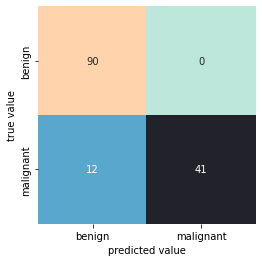

In [7]:
## MODEL BUILDING - before model tuning

svm = LinearSVC(random_state = 112)

model_metrics(svm)

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training accuracy: 0.9154929577464789
Testing accuracy: 0.8951048951048951


c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


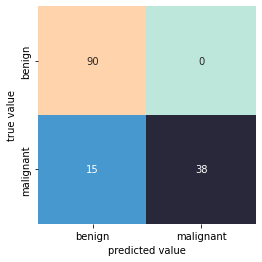

In [15]:
## MODEL BUILDING - after model tuning

svm = LinearSVC(C = 100, max_iter = 8100, penalty = 'l2', random_state = 112)

model_metrics(svm)

As can be seen here, model tuning does little to improve performance of the linear SVC (it actually decreases testing accuracy, and leads to a slightly worse model which can be seen from the confusion matrix). As expected, a linear SVM may not be sufficient to provide accurate machine learning classification of this dataset.

Another note of interest is that false negatives are much more prevalent than false positives - i.e. this model overpredicts the majority (benign) class. Class balancing techniques may be useful here to improve model performance.

### 2. Random forest

This model type tends to be accurate and robust for many applications, with in-built 'feature selection' (due to the selection between features for nodes) and the ability to capture relatively complex relationships between input features and the target. However, they tend to be uninterpretable and are prone to overfitting.

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
## MODEL TUNING

CV = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 112)
# Preliminary grid search (searches 9x6x5x3 = 810 sets of 'random' values)

grid = {'n_estimators': list(np.arange(10, 500, 50)),
        'max_depth': list(np.arange(5, 31, 5)),
        'min_samples_split': list(np.arange(2, 11, 2)),
        'max_features': ['sqrt', 'log2', None]}

prelim_grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 112), param_grid = grid, scoring = 'roc_auc', cv = CV, n_jobs = -1)
prelim_grid_search.fit(X_train, y_train)

prelim_grid_search.best_params_

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 160}

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training accuracy: 1.0
Testing accuracy: 0.972027972027972


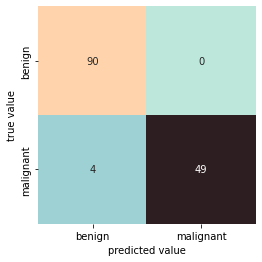

In [28]:
## MODEL BUILDING - before model tuning

rf = RandomForestClassifier(random_state = 112)

rf.fit(X_train, y_train)

model_metrics(rf)

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training accuracy: 1.0
Testing accuracy: 0.972027972027972


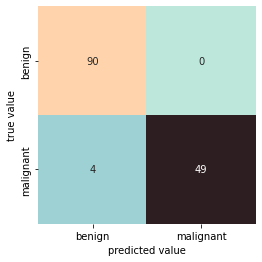

In [29]:
## MODEL BUILDING - after model tuning

rf = RandomForestClassifier(max_features = 'sqrt', min_samples_split = 2, n_estimators = 160, random_state = 112)

rf.fit(X_train, y_train)

model_metrics(rf)

As can be seen here, random forest models appear to be quite good models with very high test accuracy and reasonable confusion matrices. Once again, however, the majority class is overpredicted.

### 3. XGBoost

XGBoost is a gradient-boosting type of tree ensemble method, which means that trees are trained to sequentially and 'learn' from the mistakes/errors of the previous trees. Gradient boosting algorithms are generally associated with both faster computational speeds and higher accuracy,

In [11]:
from xgboost import XGBClassifier

In [23]:
## MODEL TUNING

CV = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 112)
# Preliminary grid search (searches 2x5x10x2 sets of 'random' values)

grid = {'booster': ['gbtree', 'dart'],
        'max_depth': list(np.arange(5, 56, 10)),
        'n_estimators': list(np.arange(10, 511, 50)),
        'objective': ['reg:logistic', 'binary:logistic']}

prelim_grid_search = GridSearchCV(estimator = XGBClassifier(random_state = 112), param_grid = grid, scoring = 'roc_auc', cv = CV, n_jobs = -1)
prelim_grid_search.fit(X_train, y_train)

prelim_grid_search.best_params_

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'booster': 'gbtree',
 'max_depth': 15,
 'n_estimators': 60,
 'objective': 'reg:logistic'}

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 1.0
Testing accuracy: 0.972027972027972


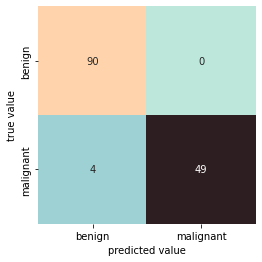

In [12]:
## MODEL BUILDING - before model tuning

xgb = XGBClassifier(random_state = 112)

xgb.fit(X_train, y_train)

model_metrics(xgb)

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training accuracy: 1.0
Testing accuracy: 0.972027972027972


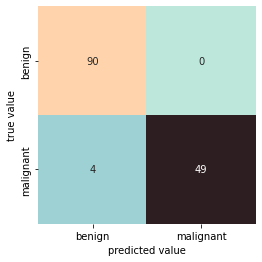

In [13]:
## MODEL BUILDING - before model tuning

xgb = XGBClassifier(booster = 'gbtree', max_depth = 15, n_estimators = 60, objective = 'reg:logistic', random_state = 112)

xgb.fit(X_train, y_train)

model_metrics(xgb)

Like the random forest model, the XGBoost model has little improvement after model tuning. Both models have identical predictions and accuracy.

Overall, the random forest and XGBoost models both show promising performance on the breast cancer dataset. However, all models overpredict the majority class and thus some method of class balancing (e.g. oversampling the minority, or malignant, class via SMOTE) may be very beneficial to investigate.

Additionally, both random forest and XGBoost models show perfect accuracy on the test dataset but somewhat lower accuracy on the train dataset, which indicates overfitting. It may be beneficial to investigate increasing model complexity to address this issue.